In [1]:
# Importing the necessary libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading dataset from Hugging Face and converting to a pandas DataFrame
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Converting the 'job_posted_date' column to datetime format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Converting 'job_skills' from stringified lists to actual Python lists
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)

In [2]:
# Set the country to filter job postings
v_job_country = 'India'

# Set the job title to focus the analysis on
v_job_title = 'Data Analyst'

# Set how many top skills to show per month in the chart
v_skill_by_month = 5

In [3]:
# Filter the data for the selected country and job title
df_DA_Ind = df[(df['job_country'] == v_job_country) & (df['job_title_short'] == v_job_title)].copy()

# Extract the month number from the job posting date
df_DA_Ind['job_posted_month_no'] = df_DA_Ind['job_posted_date'].dt.month

# Split the list of skills into separate rows
df_DA_Ind_explode = df_DA_Ind.explode('job_skills')

In [4]:
# Create a table showing how many times each skill appeared per month
df_DA_Ind_pivot = df_DA_Ind_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

# Add a row to calculate total counts for each skill across all months
df_DA_Ind_pivot.loc['Total'] = df_DA_Ind_pivot.sum()

# Sort the columns so the most frequent skills come first
df_DA_Ind_pivot = df_DA_Ind_pivot[df_DA_Ind_pivot.loc['Total'].sort_values(ascending=False).index]

# Remove the 'Total' row after sorting
df_DA_Ind_pivot.drop('Total', inplace=True)

In [5]:
# Count how many job postings were made each month
DA_totals = df_DA_Ind['job_posted_month_no'].value_counts().sort_index()

# Convert skill counts into percentages for each month
df_DA_Ind_perc = df_DA_Ind_pivot.div(DA_totals / 100, axis=0)

In [6]:
# Move the month numbers from the index into a regular column
df_DA_Ind_perc.reset_index(inplace=True)

In [7]:
# Convert the month number to the full month name (e.g., 1 → January)
df_DA_Ind_perc['job_posted_month'] = df_DA_Ind_perc['job_posted_month_no'].apply(
    lambda x: pd.to_datetime(x, format='%m').strftime('%B')
)

# Set the month name as the new index
df_DA_Ind_perc.set_index('job_posted_month', inplace=True)

# Remove the original numeric month column
df_DA_Ind_perc.drop('job_posted_month_no', axis=1, inplace=True)

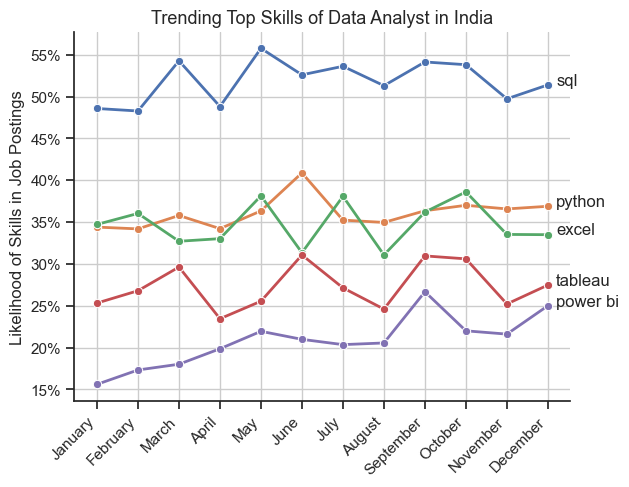

In [8]:
# Import a formatter to show y-axis values as percentages
from matplotlib.ticker import PercentFormatter

# Select the top N skills to plot (based on v_skill_by_month)
df_plot = df_DA_Ind_perc.iloc[:, :v_skill_by_month]

# Set a clean theme for the plot
sns.set_theme(style='ticks')

# Create a line chart to show skill trends over months
sns.lineplot(
    data=df_plot,
    dashes=False,
    linewidth=2,
    marker='o'
)

# Add gridlines to the plot
plt.grid()

# Remove the top and right plot borders
sns.despine()

# Hide the legend (labels will be placed manually)
plt.legend().remove()

# Add skill names at the end of each line
for i, txt in enumerate(df_plot.columns[:]):
    plt.text(11.2, df_plot.iloc[-1, i], txt)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format y-axis values as percentages (no decimal places)
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Set the title and axis labels
plt.title(f"Trending Top Skills of {v_job_title} in {v_job_country}", fontsize=13)
plt.xlabel('')
plt.ylabel('Likelihood of Skills in Job Postings')

# Show the final plot
plt.show()

In [85]:
df_plot

job_skills,sql,python,excel,tableau,power bi
job_posted_month,,,,,
January,48.566879,34.394904,34.713376,25.318471,15.605096
February,48.267898,34.180139,36.027714,26.789838,17.321016
March,54.265403,35.781991,32.701422,29.620853,18.009479
April,48.803828,34.210526,33.014354,23.444976,19.856459
May,55.755396,36.330935,38.129496,25.539568,21.942446
June,52.588556,40.871935,31.335150,31.062670,20.980926
July,53.610503,35.229759,38.074398,27.133479,20.350109
August,51.294498,34.951456,31.067961,24.595469,20.550162
September,54.126984,36.349206,36.190476,30.952381,26.666667
